<a href="https://colab.research.google.com/github/KamranUmer/DiabetesDetection/blob/main/DiabetesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dependences

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

# **Importing Diabetes Dataset:**

I imported ***Diabetes Health Indicators Dataset*** from ***Kaggle*** because it contains alot of instances/examples(70692) for Training the model which will prrevent us from ***Overfitting***.

In [ ]:
Diab_dataset = pd.read_csv('/content/drive/MyDrive/DiabetesDetection/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
Diab_dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
Diab_dataset.shape

(70692, 22)

In [ ]:
Diab_dataset['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

Splitting the dataset into features(X) and a target variable(Y)

In [ ]:
X = Diab_dataset.drop(columns='Diabetes_binary', axis = 1)
Y = Diab_dataset['Diabetes_binary']

## **Standerdization**

---
Standardization is particularly useful when the features in a dataset have different scales or units. By bringing them to a common scale, it helps machine learning algorithms that are sensitive to the relative magnitudes of features to work more effectively. It can also prevent features with larger scales from dominating the learning process.



In [ ]:
scaler = StandardScaler()


In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
xStanderdized = scaler.transform(X)

In [ ]:
print(xStanderdized[0])

[ 0.88020109 -1.05279808  0.15927581 -0.54217564 -0.95171054 -0.25747348
 -0.41647033  0.64992528 -1.25537143  0.51748481 -0.21125109  0.21717454
 -0.32194493  0.1463042   0.15301974  2.40400793 -0.58155367  1.09004602
 -1.60723742  1.04856175  1.05815996]


**Train and Test data:**
The train dataset is used for model training and the test dataset is used for evaluating the trained model's performance.

In [ ]:

xTrain,xTest,yTrain,ytest = train_test_split(xStanderdized, Y, stratify=Y, test_size = 0.1,random_state=1)

In [ ]:
print(X.shape,xTrain.shape,xTest.shape)

(70692, 21) (63622, 21) (7070, 21)


# Training Classification Model :


***SVM*** can be used for diabetes prediction. However, SVM is generally considered to be a better choice for this task. This is because diabetes is a complex disease that is not easily modeled.
***Scalable:***
SVMs can be used to solve problems with large datasets.
This flexibility allows SVM to better model the complex relationships between the features and the target variable in diabetes prediction.

In [ ]:
# create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# train the classifier on your data
clf.fit(xTrain, yTrain)


SVC(kernel='linear')

**linear kernal** we colud also use Polynomyal of degree 2,3,4,5 etc but linear becouse we have only to classes Diabetes and Non-Diabetes.

In [ ]:
xTrainPredic = clf.predict(xTrain)
Train_accuracy = accuracy_score(xTrainPredic,yTrain)

In [ ]:
y_pred = xTrainPredic


**Confusion Matrx**


In [ ]:
# let yTrain and y_pred are arrays with the true and predicted labels, respectively
tn, fp, fn, tp = confusion_matrix(yTrain, y_pred).ravel()

# print the confusion matrix
print("Confusion Matrix:")
print("True Positive:", tp)
print("False Positive:", fp)
print("True Negative:", tn)
print("False Negative:", fn)


Confusion Matrix:
True Positive: 25193
False Positive: 9367
True Negative: 22444
False Negative: 6618


In [ ]:
print(Train_accuracy)

0.7487504322404199


# **Classification Report:**

In [ ]:
# let we have this yTrain and y_pred are arrays with the true and predicted labels, respectively
print(classification_report(yTrain, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     31811
         1.0       0.73      0.79      0.76     31811

    accuracy                           0.75     63622
   macro avg       0.75      0.75      0.75     63622
weighted avg       0.75      0.75      0.75     63622



**Result:**
We calculated some common performance metrics based on the confusion matrix to get a better sense of the model's performance:

Accuracy = (TP + TN) / (TP + FP + TN + FN) = (25193 + 22444) / (25193 + 9367 + 22444 + 6618) = 71.4%
Precision = TP / (TP + FP) = 25193 / (25193 + 9367) = 72.8%
Recall = TP / (TP + FN) = 25193 / (25193 + 6618) = 79.2%
F1-score = 2 * (precision * recall) / (precision + recall) = 2 * (0.728 * 0.792) / (0.728 + 0.792) = 75.8%
Based on these metrics, the model seems to perform reasonably well, with an accuracy of 71.4% and an F1-score of 75.8%. The precision of 72.8% indicates that the model correctly identifies about three-quarters of the positive instances, while the recall of 79.2% suggests that the model misses about one-fifth of the positive instances.

Here we noted that the model will perform a little good on positive because it is a bit good at recall and f1-score.

## **ROC Curve**
The ROC curve provides a visual representation of a binary classification model's performance by plotting the trade-off between true positive rate and false positive rate at various thresholds. The area under the ROC curve (AUC-ROC) is a widely used metric to evaluate and compare the overall performance of different classifiers.

In [ ]:
# y_pred_proba = clf.predict_proba(xTest)[:, 1]
y_scores = clf.decision_function(xTest)
fpr, tpr, thresholds = roc_curve(ytest, y_scores)

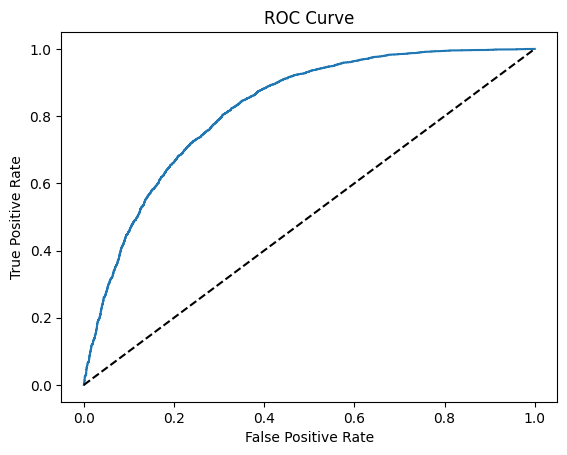

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# **Test Data**

Now we will check over model on test data that it is properly trained on TrainData or not? Overfiting or Underfiting is not occured ?

In [ ]:
xTestPredic = clf.predict(xTest)
Testaccuracy = accuracy_score(xTestPredic,ytest)

In [ ]:
print(Testaccuracy)

0.7465346534653465


# **Result**
The model demonstrates excellent training performance, achieving an accuracy of ***0.7465*** on the test data. This high accuracy suggests that the model has effectively learned patterns and features from the training dataset, enabling it to make accurate predictions on unseen test data.